<a href="https://colab.research.google.com/github/Somcodo4/using-study-hours-and-attendance-to-predict-exam-scores-via-ANN./blob/main/using_study_hours_and_attendance_to_predict_exam_scores_via_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#using study hours and attendance to predict exam scores
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
import pandas as pd
import numpy as np

# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [23]:
# Load the correlated dataset
correlated_students_data = pd.read_csv('correlated_class_grade_for_prediction.csv')



In [24]:
# Load dataset from CSV file
df=pd.read_csv('correlated_class_grade_for_prediction.csv')

In [25]:
df.head()

,Study_Hours_per_Week,Attendance_Percentage,Exam_Score
0,33,78.943245,50.0
1,19,71.923706,50.0
2,12,83.601307,50.0
3,25,66.407633,50.0
4,23,57.752081,50.0


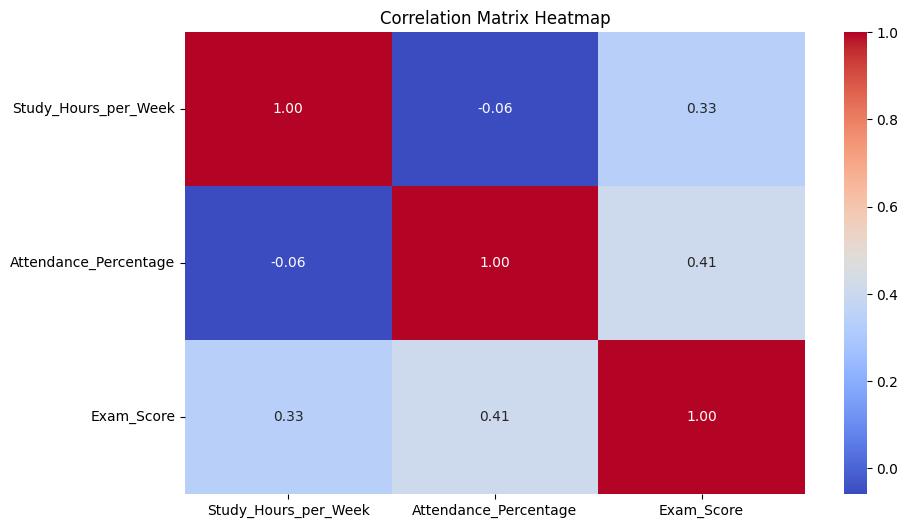

In [26]:
# Calculate the Correlation Matrix
correlation_matrix = correlated_students_data.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
# Define features and target
X = correlated_students_data[['Study_Hours_per_Week', 'Attendance_Percentage']]
y = correlated_students_data['Exam_Score']

In [28]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [29]:


# Build the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='linear'))  # Output layer (predicting exam score)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
mse_nn = model.evaluate(X_test, y_test)

# Predict on the test set
y_pred_nn = model.predict(X_test)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 2604.7822 - val_loss: 2584.8560
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2608.7993 - val_loss: 2567.0898
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2538.1301 - val_loss: 2547.2292
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2562.1584 - val_loss: 2523.3218
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2525.3472 - val_loss: 2493.5520
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2489.2883 - val_loss: 2457.4705
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2441.6606 - val_loss: 2414.2083
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2417.0151 - val_loss: 2362.8806
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2357.8792 - val_loss: 2303.2502
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2298.9956 - val_loss: 2234.1843
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2234.3445 - val_loss: 2155.0081
Epoch 12/200
7/7 

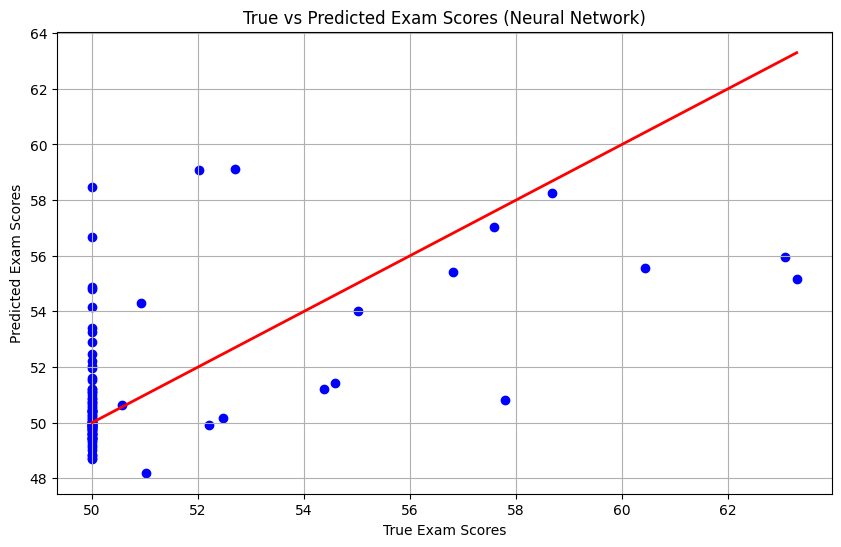

In [31]:
# Plot: True vs Predicted Exam Scores (Neural Network)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.xlabel('True Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('True vs Predicted Exam Scores (Neural Network)')
plt.grid(True)
plt.show()

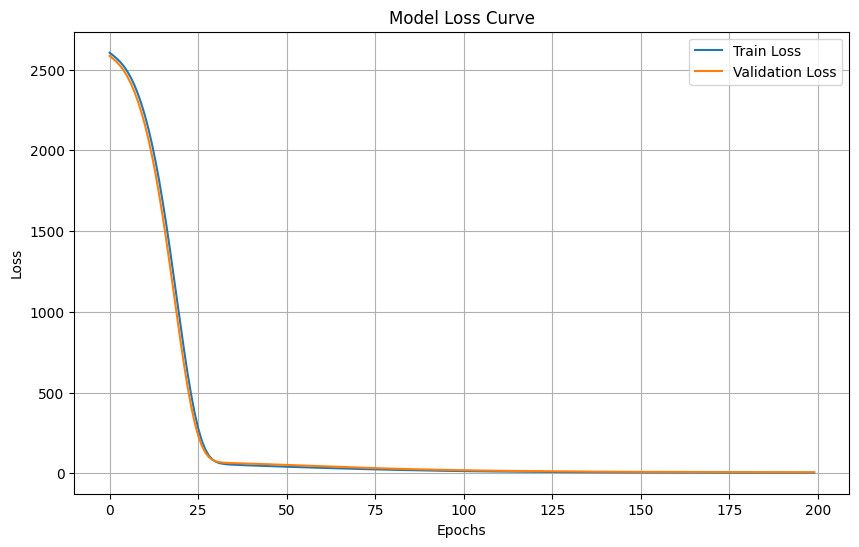

6.589749336242676

In [32]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print the Mean Squared Error of the Neural Network
mse_nn


In [35]:


# Evaluate the model on the test set
mse_nn = model.evaluate(X_test, y_test)

# Predict on the test set
y_pred_nn = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print Mean Squared Error and R-squared
print(f'Mean Squared Error (MSE): {mse_nn}')
print(f'R-squared (R²): {r2_nn}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6693 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 6.589749628956015
R-squared (R²): 0.1394872814380066


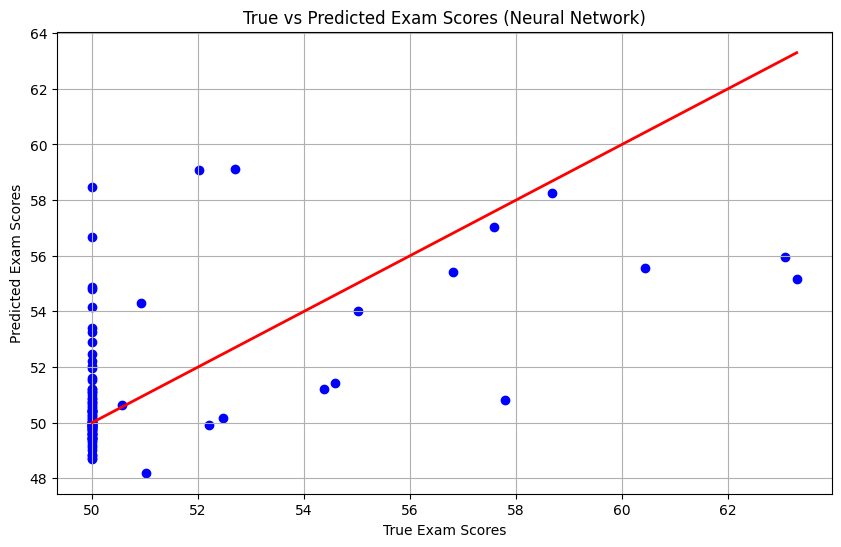

In [36]:
# Plot: True vs Predicted Exam Scores (Neural Network)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.xlabel('True Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('True vs Predicted Exam Scores (Neural Network)')
plt.grid(True)
plt.show()